In [14]:
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp
from flowjax.distributions import StandardNormal
from flowjax.flows import BlockNeuralAutoregressiveFlow

import flows
import importlib

In [37]:
importlib.reload(flows)

<module 'flows' from '/home/ADF/mdm988/matt/code/shallow/shallow/jax/flows.py'>

In [48]:
flow = BlockNeuralAutoregressiveFlow(
    key=jax.random.PRNGKey(0),
    base_dist=StandardNormal(shape=(2,)),
    nn_depth=1,
    nn_block_dim=1,
    flow_layers=1,
    invert=True,
)

bounds = [[0, 1], [0, 1]]
x = jax.random.uniform(jax.random.PRNGKey(0), (1_000,))
xx = jnp.repeat(x[:, None], 2, axis=1)
flow = flows.BoundedFlow(flow, bounds, xx)

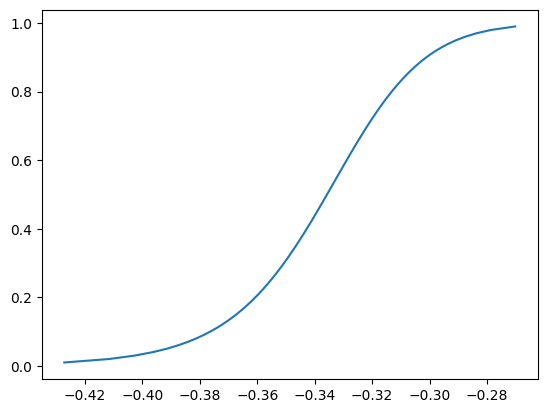

In [27]:
x = jnp.linspace(0, 1, 100)
z = jax.vmap(flow.bijection.inverse)(x[:, None])
plt.plot(z, x)

In [28]:
xx = flows.numerical_inverse(flow, z, bounds=bounds)
plt.hist(xx.flatten() - x);

XlaRuntimeError: The linear solver returned non-finite (NaN or inf) output. This usually means that the
operator was not well-posed, and that the solver does not support this.

If you are trying solve a linear least-squares problem then you should pass
`solver=AutoLinearSolver(well_posed=False)`. By default `lineax.linear_solve`
assumes that the operator is square and nonsingular.

If you *were* expecting this solver to work with this operator, then it may be because:

(a) the operator is singular, and your code has a bug; or

(b) the operator was nearly singular (i.e. it had a high condition number:
    `jnp.linalg.cond(operator.as_matrix())` is large), and the solver suffered from
    numerical instability issues; or

(c) the operator is declared to exhibit a certain property (e.g. positive definiteness)
    that is does not actually satisfy.
-------
This error occurred during the runtime of your JAX program. Setting the environment
variable `EQX_ON_ERROR=breakpoint` is usually the most useful way to debug such errors.
(This can be navigated using most of the usual commands for the Python debugger:
`u` and `d` to move through stack frames, the name of a variable to print its value,
etc.) See also `https://docs.kidger.site/equinox/api/errors/#equinox.error_if` for more
information.
